## **Machine Learning for Social Media-Based Depression Analysis** 

## Business Understanding

Mental health is an urgent issue globally, with depression affecting millions of individuals across all demographics. 
The internet, and particularly social media, has become a place where people often express their struggles, including depression. 
Early detection of depression symptons can be crucial in providing timely support or intervention. This project’s goal is to leverage data science to better understand and detect depressive expressions in online platforms, potentially paving the way for more proactive mental health support. Given the widespread use of platforms like Reddit, this research could benefit individuals by increasing awareness and intervention opportunities

***

## Data Understanding

Datasource: https://www.kaggle.com/datasets/rishabhkausish/reddit-depression-dataset/data 

The dataset already includes several key features that can be used to analyze and predict depression indicators based on Reddit posts. Specifically, the data has 7 key columns:


**subreddit** : The subreddit where each post was made, with posts from *"Depression"* and *"SuicideWatch"* labeled as 1 for depression and posts from other subreddits labeled as 0 (non-depression).

**title**: The title of the Reddit post.

**body**: The full text of the Reddit post, which may contain valuable information for understanding the context, tone, and possible indicators of depression.

**upvotes**: Number of upvotes each post received, which may indicate the post's visibility or resonance with the community.

**created_utc**: The timestamp of when the post was created in UTC, which can help in analyzing temporal trends.

**num_comments**: The number of comments on each post, which could provide insights into community engagement.

**label**: The target variable indicating depression (1) or non-depression (0) based on subreddit.
....
The raw data was collected  from five Reddit subreddits (sub topics), categorized based on their content. These included: Teenagers, Depression, SuicideWatch, DeepThoughts, Happy

Since the data is already collected from Reddit, with over 6 million rows, further data acquisition may not be necessary. Infact, the team proposes reducing the dataset to about 500,000 rows for the purpose of this project(and to save our laptops). However, if additional data is needed, we could plan to scrape Reddit for more recent posts using a tool that we could identify through further research, provided we comply with Reddit's data collection policies and privacy standards.


****

## Data Preparation

The dataset was reduced since it was too huge to work with.The data was reduced to 98826 features with 6 columns.there are null values in body and num_comments.

Import the necessary libraries

In [29]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt', quiet=True)
np.random.seed(0)

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
df=pd.read_csv(r"C:\Users\user\Documents\final_project\Data\reduced_reddit.csv")
df

,subreddit,title,body,upvotes,created_utc,num_comments,label
0,teenagers,Day 18 of doing 50 push-ups,NaN,4.0,1.619357e+09,4.0,0.0
1,teenagers,There isn’t a better feeling than finishing yo...,Then your teacher hits you with that “ Good jo...,7.0,1.554103e+09,NaN,0.0
2,teenagers,LMAOOO I can only get this guy to talk to me i...,Yeahhh maybe not babe,4.0,1.649342e+09,12.0,0.0
3,teenagers,This isn't going to work out,NaN,236.0,1.417630e+09,33.0,0.0
4,teenagers,Am I the only guy who found it hurtful as a ch...,\n\nLike... why? How is that funny? How does ...,6.0,1.569280e+09,4.0,0.0
...,...,...,...,...,...,...,...
98821,depression,Has anyone ever had any problems with gangs?,I don't care if my grammer isn't good so dont ...,8.0,1.558082e+09,1.0,1.0
98822,SuicideWatch,"Moments away from killing myself, not even bot...","I don't want to talk about my problems, I don'...",12.0,1.350754e+09,8.0,1.0
98823,SuicideWatch,I've grown used to being like this for years.,"I'm not suicidal at the moment, in fact I feel...",14.0,1.432074e+09,4.0,1.0
98824,depression,This speech from The Lord of the Rings really ...,"""It's like in the great stories, Mr. Frodo. Th...",323.0,1.355673e+09,28.0,1.0


In [68]:
df.tail(10)

,subreddit,title,body,upvotes,created_utc,num_comments,label
98816,depression,can anyone chat with me? i feel so alone.,thank you for all the messages. i’m not able t...,59.0,1.646873e+09,63.0,1.0
98817,suicidewatch,why can’t i just die,i wish i was dead. i was having such a great m...,10.0,1.564880e+09,4.0,1.0
98818,depression,i'm picturing shooting myself in the head ever...,i got a good job with a reasonable salary for ...,11.0,1.504609e+09,2.0,1.0
98819,suicidewatch,make it stop.,please make it stop. i don't know what i'm doi...,15.0,1.513592e+09,8.0,1.0
98820,depression,without her i’m lost,we are pretty good friends and talk daily. but...,4.0,1.587683e+09,1.0,1.0
98821,depression,has anyone ever had any problems with gangs?,i don't care if my grammer isn't good so dont ...,8.0,1.558082e+09,1.0,1.0
98822,suicidewatch,"moments away from killing myself, not even bot...","i don't want to talk about my problems, i don'...",12.0,1.350754e+09,8.0,1.0
98823,suicidewatch,i've grown used to being like this for years.,"i'm not suicidal at the moment, in fact i feel...",14.0,1.432074e+09,4.0,1.0
98824,depression,this speech from the lord of the rings really ...,"""it's like in the great stories, mr. frodo. th...",323.0,1.355673e+09,28.0,1.0
98825,suicidewatch,i just don't know....,i have never thought that i will end up in thi...,5.0,1.328355e+09,3.0,1.0


In [31]:
#there are a total of 98826 features,null values are in body and num_comment
#we will drop null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98826 entries, 0 to 98825
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     98826 non-null  object 
 1   title         98826 non-null  object 
 2   body          80371 non-null  object 
 3   upvotes       98826 non-null  float64
 4   created_utc   98826 non-null  float64
 5   num_comments  94297 non-null  float64
 6   label         98826 non-null  float64
dtypes: float64(4), object(3)
memory usage: 5.3+ MB


In [32]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77051 entries, 2 to 98825
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   subreddit     77051 non-null  object 
 1   title         77051 non-null  object 
 2   body          77051 non-null  object 
 3   upvotes       77051 non-null  float64
 4   created_utc   77051 non-null  float64
 5   num_comments  77051 non-null  float64
 6   label         77051 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.7+ MB


### Text cleaning and Preprocessing

In [33]:
#lower casing the text
df['title'] = df['title'].str.lower().copy()
low_column=df[['subreddit','body']]
for col in low_column:
    df[col]=df[col].str.lower()



C:\Users\user\AppData\Local\Temp\ipykernel_23364\3471966554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['title'] = df['title'].str.lower().copy()
C:\Users\user\AppData\Local\Temp\ipykernel_23364\3471966554.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].str.lower()


In [34]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import unicodedata

In [35]:
#preprocessing
def preprocessing_text(text):
    #remove punctuations
    text = text.translate(str.maketrans('','', string.punctuation))
    #remove numbers
    text= re.sub(r'd/+', '',text)
    #remove stopwords
    stop_word=set(stopwords.words('english'))
    text=' '.join([word for word in text.split() if word not in stop_word])
    #tokenization
    tokens=word_tokenize(text)
    #lemmatization
    lemitizer= WordNetLemmatizer()
    tokens= [lemitizer.lemmatize(word) for word in tokens]
    #rejoin token
    text=' '.join(tokens)
    #remove extra whitespace
    text=' '.join(text.split())
    return text
    

In [44]:
#preprocess the text 
df_pre=pd.DataFrame(df[['title','body','subreddit']].applymap(preprocessing_text))

In [ ]:
#categorical columns
df_num=pd.DataFrame(df[['upvotes','num_comments','label']])

In [46]:
#removing emojis from the title column
import emoji
def remove_emoji(text):
    return emoji.replace_emoji(text,'')

df_pre=df_pre.applymap(remove_emoji)


### Text Transformation

In [48]:
# we will encode the title column with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
tf_idf_vectorizer_matrix= tf_idf_vectorizer.fit_transform(df_pre)
#vect_array=tf_idf_vectorizer_matrix.toarray()
print(tf_idf_vectorizer_matrix.shape)
vect_names=tf_idf_vectorizer.get_feature_names_out()
print(vect_names)





(3, 3)
['body' 'subreddit' 'title']


In [51]:
# # ENCODE THE BODY COLUMN
# tf_idf_vectorizer = TfidfVectorizer()
# tf_idf_vectorizer_matrix= tf_idf_vectorizer.fit_transform.(df['body'])
# #vect_array=tf_idf_vectorizer_matrix.toarray()
# print(tf_idf_vectorizer_matrix.shape)
# vect_names=tf_idf_vectorizer.get_feature_names_out()
# print(vect_names)

TF-IDF matrix contains mostly zero values, and the feature names (terms) include a mix of regular words and potentially unusual characters (e.g., 𝚜𝚝𝚞𝚏𝚏, 𝟒𝟖𝟕).
The TF-IDF matrix is sparse, meaning that most of the entries are zeros

In [52]:
#GET THE TOP WORDS FROM 
# Sum up the TF-IDF scores across all documents for each word
tfidf_sums = tf_idf_vectorizer_matrix.sum(axis=0).A1 

# Get the top N indices of the terms with the highest TF-IDF scores
top_n = 10  # Adjust N as needed
top_n_indices = np.argsort(tfidf_sums)[::-1][:top_n]

# Get the top N words based on their TF-IDF sum
top_n_words = [vect_names[i] for i in top_n_indices]

# Print the top N words and their corresponding TF-IDF scores
top_n_scores = tfidf_sums[top_n_indices]
for word, score in zip(top_n_words, top_n_scores):
    print(f"{word}: {score}")


title: 1.0
subreddit: 1.0
body: 1.0


In [56]:
#FEATURE ENGINEER
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# TextBlob 
def sentiment_score_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Range: -1 (negative) to +1 (positive)

# VADER 
def sentiment_score_vader(text):
    sid = SentimentIntensityAnalyzer()
    score = sid.polarity_scores(text)
    return score['compound']  # Compound score combines positive/negative into one score


# text = df['title']
# print(sentiment_score_textblob(text))  # TextBlob sentiment score
# print(sentiment_score_vader(text))     # VADER compound sentiment score

sentiment_score= df_pre.head(10).applymap(sentiment_score_vader)
sentiment_score_blob= df_pre.head(10).applymap(sentiment_score_textblob)
print("vader sentiment score:",sentiment_score)
print("sentiment score blob:",sentiment_score_blob)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


vader sentiment score:      title    body  subreddit
2   0.2732  0.0000        0.0
4  -0.0258 -0.2500        0.0
6   0.4588  0.0000        0.0
7  -0.1027 -0.1531        0.0
8   0.0000  0.8819        0.0
9  -0.1779 -0.2837        0.0
11  0.0000  0.0000        0.0
12  0.4019  0.0000        0.0
13  0.0000  0.0000        0.0
14  0.0000  0.0000        0.0
sentiment score blob:        title      body  subreddit
2   0.000000  0.000000        0.0
4   0.109722  0.027778        0.0
6   0.500000  0.000000        0.0
7  -0.291667  0.000000        0.0
8   0.000000  0.106667        0.0
9   0.000000 -0.404762        0.0
11  0.000000  0.100000        0.0
12 -0.600000  0.250000        0.0
13  0.000000  0.000000        0.0
14  0.000000  0.000000        0.0


## Exploratory Data Analysis

In [ ]:
#word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def word_cloud(text):
    df_cloud = " ".join(text.tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(df_cloud)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis
    plt.show()

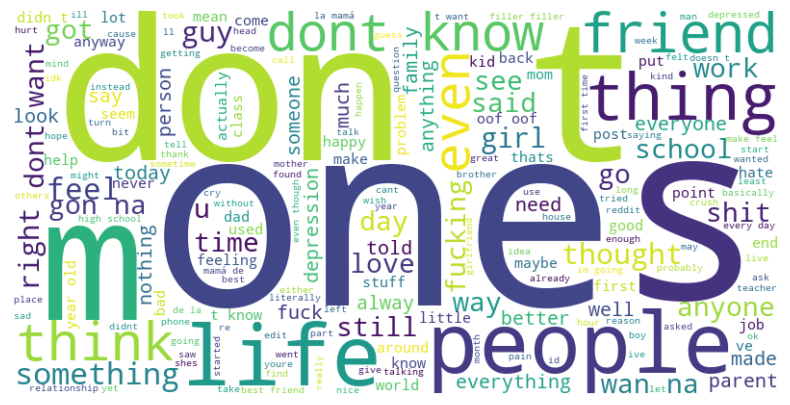

In [ ]:


# wordcloud for combined title and body columns
text = ' '.join(df_pre['title'].astype(str) + ' ' + df_pre['body'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


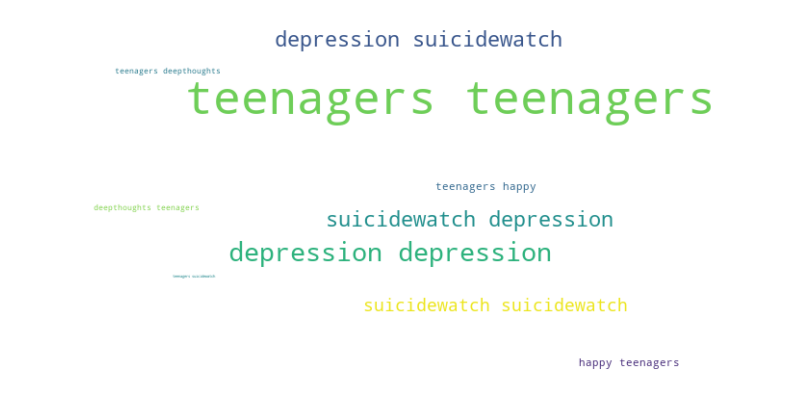

In [61]:
word_cloud(df['subreddit'])

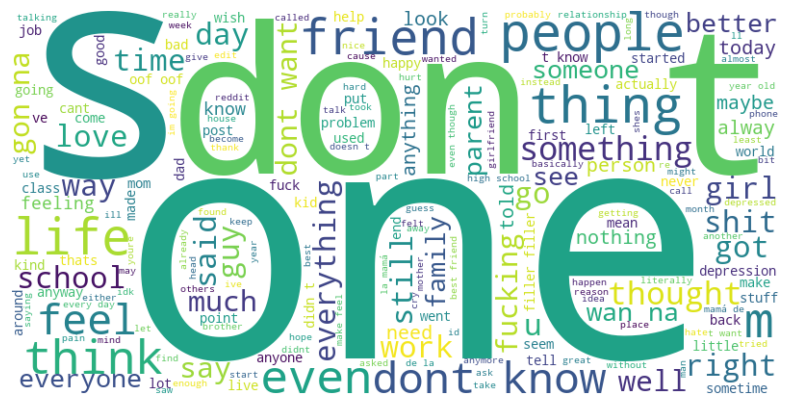

In [ ]:
word_cloud(df['body'])

In [67]:
#Topic modelling by using Latent Dirichlet Allocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora
from gensim.models import LdaModel

df_pre['combined_text'] = df_pre['title'].astype(str) + ' ' + df_pre['body'].astype(str) + ' ' + df_pre['subreddit'].astype(str)
tokenized_text = df_pre['combined_text'].apply(lambda x: x.split()) 


#create dictionary for LDA
dictionary= corpora.Dictionary(tokenized_text)
corpus= [dictionary.doc2bow(text) for text in tokenized_text]
num_topic= 3
lda_model=LdaModel(corpus,num_topics=num_topic,id2word=dictionary,passes=10)

for idx , topic in lda_model.print_topics(-1):
    print(f'Topic{idx+1}:{topic}')

Topic1:0.184*"’" + 0.074*"i" + 0.066*"t" + 0.050*"m" + 0.034*"s" + 0.029*"don" + 0.018*"it" + 0.018*"ve" + 0.014*"can" + 0.011*"like"
Topic2:0.050*"teenager" + 0.017*"na" + 0.013*"wan" + 0.008*"20" + 0.008*"guy" + 0.008*"post" + 0.005*"fuck" + 0.005*"like" + 0.005*"day" + 0.005*"sex"
Topic3:0.020*"im" + 0.013*"like" + 0.012*"dont" + 0.012*"feel" + 0.010*"depression" + 0.010*"want" + 0.010*"life" + 0.009*"know" + 0.008*"get" + 0.008*"time"


## Model Selection and Trainning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Concatenate DataFrames
df_model = pd.concat([df_pre, df_num], axis=1)

# Allocate X and y
y = df_model['label']
X = df_model[['title', 'body']].astype(str)  # Convert X to string format to avoid type issues

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Concatenate 'title' and 'body' columns as a single text for vectorization
X_train_text = X_train['title'] + ' ' + X_train['body']
X_test_text = X_test['title'] + ' ' + X_test['body']

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train_text)  # Fit and transform training data
X_test_vect = vectorizer.transform(X_test_text)        # Transform test data

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear'),
    "Decision Tree": DecisionTreeClassifier()
}

# Train, predict, and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)  # Use X_test_vect instead of X_test
    print(f".......{model_name}......")
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n")


.......Logistic Regression......
Accuracy score: 0.9247290896113166
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95     12040
         1.0       0.87      0.77      0.82      3371

    accuracy                           0.92     15411
   macro avg       0.90      0.87      0.89     15411
weighted avg       0.92      0.92      0.92     15411



.......Naive Bayes......
Accuracy score: 0.8894945169035104
              precision    recall  f1-score   support

         0.0       0.88      0.99      0.93     12040
         1.0       0.93      0.53      0.68      3371

    accuracy                           0.89     15411
   macro avg       0.91      0.76      0.81     15411
weighted avg       0.89      0.89      0.88     15411



